In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
# Normalize the features (LSTM models work better with normalized data)
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SCIHACK 2024/ML/Dataset/merged_trip_data_with_overview.csv')
df

<ipython-input-3-08b57097f58e>:1: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SCIHACK 2024/ML/Dataset/merged_trip_data_with_overview.csv')


Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
0             0.0              0.0          574.0           0.0   
1             0.1              0.0          574.0           0.0   
2             0.2              0.0          574.0           0.0   
3             0.3              0.0          574.0           0.0   
4             0.4              0.0          574.0           0.0   
...           ...              ...            ...           ...   
1094788    1642.4              NaN          476.0           0.0   
1094789    1642.5              NaN          476.0           0.0   
1094790    1642.6              NaN          476.0           0.0   
1094791    1642.7              NaN          476.0           0.0   
1094792    1642.8              NaN          476.0           0.0   

         Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
0                      0.0                              -0.03   
1                      0.0                               0.00   
2                      0.0                              -0.01   
3                      0.0                              -0.03   
4                      0.0                              -0.03   
...                    ...                                ...   
1094788                2.5                              -0.04   
1094789                2.5                              -0.04   
1094790                2.5                              -0.04   
1094791                2.5                              -0.04   
1094792                2.5                              -0.04   

         Regenerative Braking Signal   Battery Voltage [V]  \
0                                 0.0               391.40   
1                                 0.0               391.40   
2                                 0.0               391.40   
3                                 0.0               391.40   
4                                 0.0               391.40   
...                               ...                  ...   
1094788                           0.0               367.15   
1094789                           0.0               367.20   
1094790                           0.0               367.15   
1094791                           0.0               367.10   
1094792                           0.0               367.10   

         Battery Current [A]  Battery Temperature [°C]  ...  \
0                      -2.20                      21.0  ...   
1                      -2.21                      21.0  ...   
2                      -2.26                      21.0  ...   
3                      -2.30                      21.0  ...   
4                      -2.30                      21.0  ...   
...                      ...                       ...  ...   
1094788                -4.00                       3.0  ...   
1094789                -4.20                       3.0  ...   
1094790                -4.05                       3.0  ...   
1094791                -3.90                       3.0  ...   
1094792                -3.90                       3.0  ...   

         Battery State of Charge (Start)  Battery State of Charge (End)  \
0                                  0.863                          0.803   
1                                  0.863                          0.803   
2                                  0.863                          0.803   
3                                  0.863                          0.803   
4                                  0.863                          0.803   
...                                  ...                            ...   
1094788                            0.650                          0.488   
1094789                            0.650                          0.488   
1094790                            0.650                          0.488   
1094791                            0.650                          0.488   
1094792                            0.650                          0.488   

         Unnamed: 8 

In [4]:
df = df.drop(['Unnamed: 13','Note'], axis=1)
df.rename(columns = {'Unnamed: 8':'SoC difference'}, inplace = True)
df

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
0             0.0              0.0          574.0           0.0   
1             0.1              0.0          574.0           0.0   
2             0.2              0.0          574.0           0.0   
3             0.3              0.0          574.0           0.0   
4             0.4              0.0          574.0           0.0   
...           ...              ...            ...           ...   
1094788    1642.4              NaN          476.0           0.0   
1094789    1642.5              NaN          476.0           0.0   
1094790    1642.6              NaN          476.0           0.0   
1094791    1642.7              NaN          476.0           0.0   
1094792    1642.8              NaN          476.0           0.0   

         Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
0                      0.0                              -0.03   
1                      0.0                               0.00   
2                      0.0                              -0.01   
3                      0.0                              -0.03   
4                      0.0                              -0.03   
...                    ...                                ...   
1094788                2.5                              -0.04   
1094789                2.5                              -0.04   
1094790                2.5                              -0.04   
1094791                2.5                              -0.04   
1094792                2.5                              -0.04   

         Regenerative Braking Signal   Battery Voltage [V]  \
0                                 0.0               391.40   
1                                 0.0               391.40   
2                                 0.0               391.40   
3                                 0.0               391.40   
4                                 0.0               391.40   
...                               ...                  ...   
1094788                           0.0               367.15   
1094789                           0.0               367.20   
1094790                           0.0               367.15   
1094791                           0.0               367.10   
1094792                           0.0               367.10   

         Battery Current [A]  Battery Temperature [°C]  ...  \
0                      -2.20                      21.0  ...   
1                      -2.21                      21.0  ...   
2                      -2.26                      21.0  ...   
3                      -2.30                      21.0  ...   
4                      -2.30                      21.0  ...   
...                      ...                       ...  ...   
1094788                -4.00                       3.0  ...   
1094789                -4.20                       3.0  ...   
1094790                -4.05                       3.0  ...   
1094791                -3.90                       3.0  ...   
1094792                -3.90                       3.0  ...   

         Battery Temperature (Start) [°C]  Battery Temperature (End)  \
0                                    21.0                       22.0   
1                                    21.0                       22.0   
2                                    21.0                       22.0   
3                                    21.0                       22.0   
4                                    21.0                       22.0   
...                                   ...                        ...   
1094788                              -1.0                        3.0   
1094789                              -1.0                        3.0   
1094790                              -1.0                        3.0   
1094791                              -1.0                        3.0   
1094792                              -1.0                        3.0   

         Battery State of Charge (Start)  Battery State 

In [5]:
df = df.drop('Unnamed: 23', axis=1)
df.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0       0.0              0.0          574.0           0.0                0.0   
1       0.1              0.0          574.0           0.0                0.0   
2       0.2              0.0          574.0           0.0                0.0   
3       0.3              0.0          574.0           0.0                0.0   
4       0.4              0.0          574.0           0.0                0.0   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                              -0.03                           0.0   
1                               0.00                           0.0   
2                              -0.01                           0.0   
3                              -0.03                           0.0   
4                              -0.03                           0.0   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  ...  \
0                391.4                -2.20                      21.0  ...   
1                391.4                -2.21                      21.0  ...   
2                391.4                -2.26                      21.0  ...   
3                391.4                -2.30                      21.0  ...   
4                391.4                -2.30                      21.0  ...   

   Battery Temperature (Start) [°C]  Battery Temperature (End)  \
0                              21.0                       22.0   
1                              21.0                       22.0   
2                              21.0                       22.0   
3                              21.0                       22.0   
4                              21.0                       22.0   

   Battery State of Charge (Start)  Battery State of Charge (End)  \
0                            0.863                          0.803   
1                            0.863                          0.803   
2                            0.863                          0.803   
3                            0.863                          0.803   
4                            0.863                          0.803   

   SoC difference  Ambient Temperature (Start) [°C]  Target Cabin Temperature  \
0            0.06                              25.5                      23.0   
1            0.06                              25.5                      23.0   
2            0.06                              25.5                      23.0   
3            0.06                              25.5                      23.0   
4            0.06                              25.5                      23.0   

   Distance [km]  Duration [min]                 Fan  
0        7.42769           16.82  Automatic, Level 1  
1        7.42769           16.82  Automatic, Level 1  
2        7.42769           16.82  Automatic, Level 1  
3        7.42769           16.82  Automatic, Level 1  
4        7.42769           16.82  Automatic, Level 1  

[5 rows x 63 columns]

In [6]:
df.fillna(0, inplace=True)

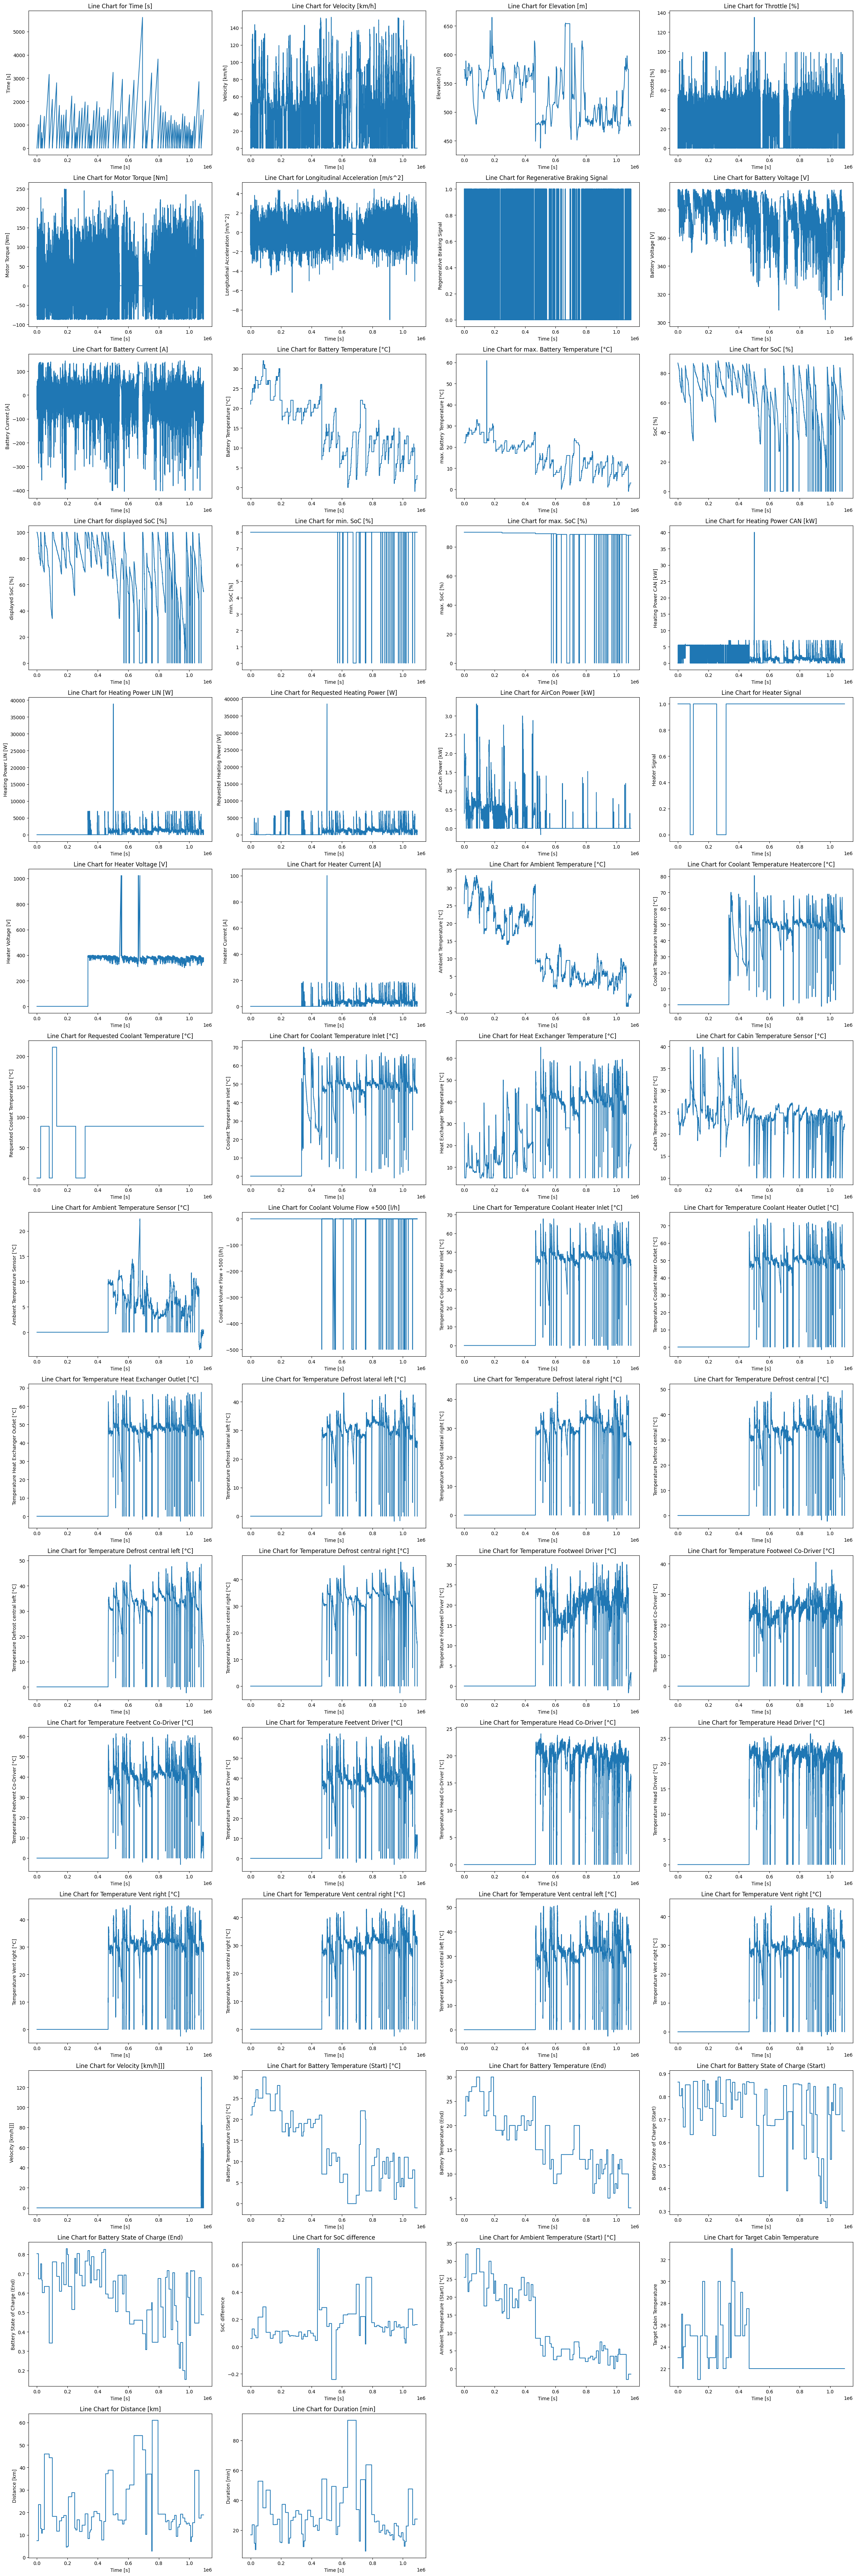

In [7]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Determine number of rows and columns for the grid
num_charts = len(numeric_cols)
num_cols = 4
num_rows = (num_charts + num_cols - 1) // num_cols  # This ensures enough rows for all charts

# Create subplots with the desired number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))

# Flatten the 2D axes array to iterate over it easily
axs = axs.flatten()

# Loop through the numeric columns and plot each in its respective subplot
for i, col in enumerate(numeric_cols):
    axs[i].plot(df[col])
    axs[i].set_title(f'Line Chart for {col}')
    axs[i].set_xlabel('Time [s]')  # Assuming x-axis is time
    axs[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


<Axes: >

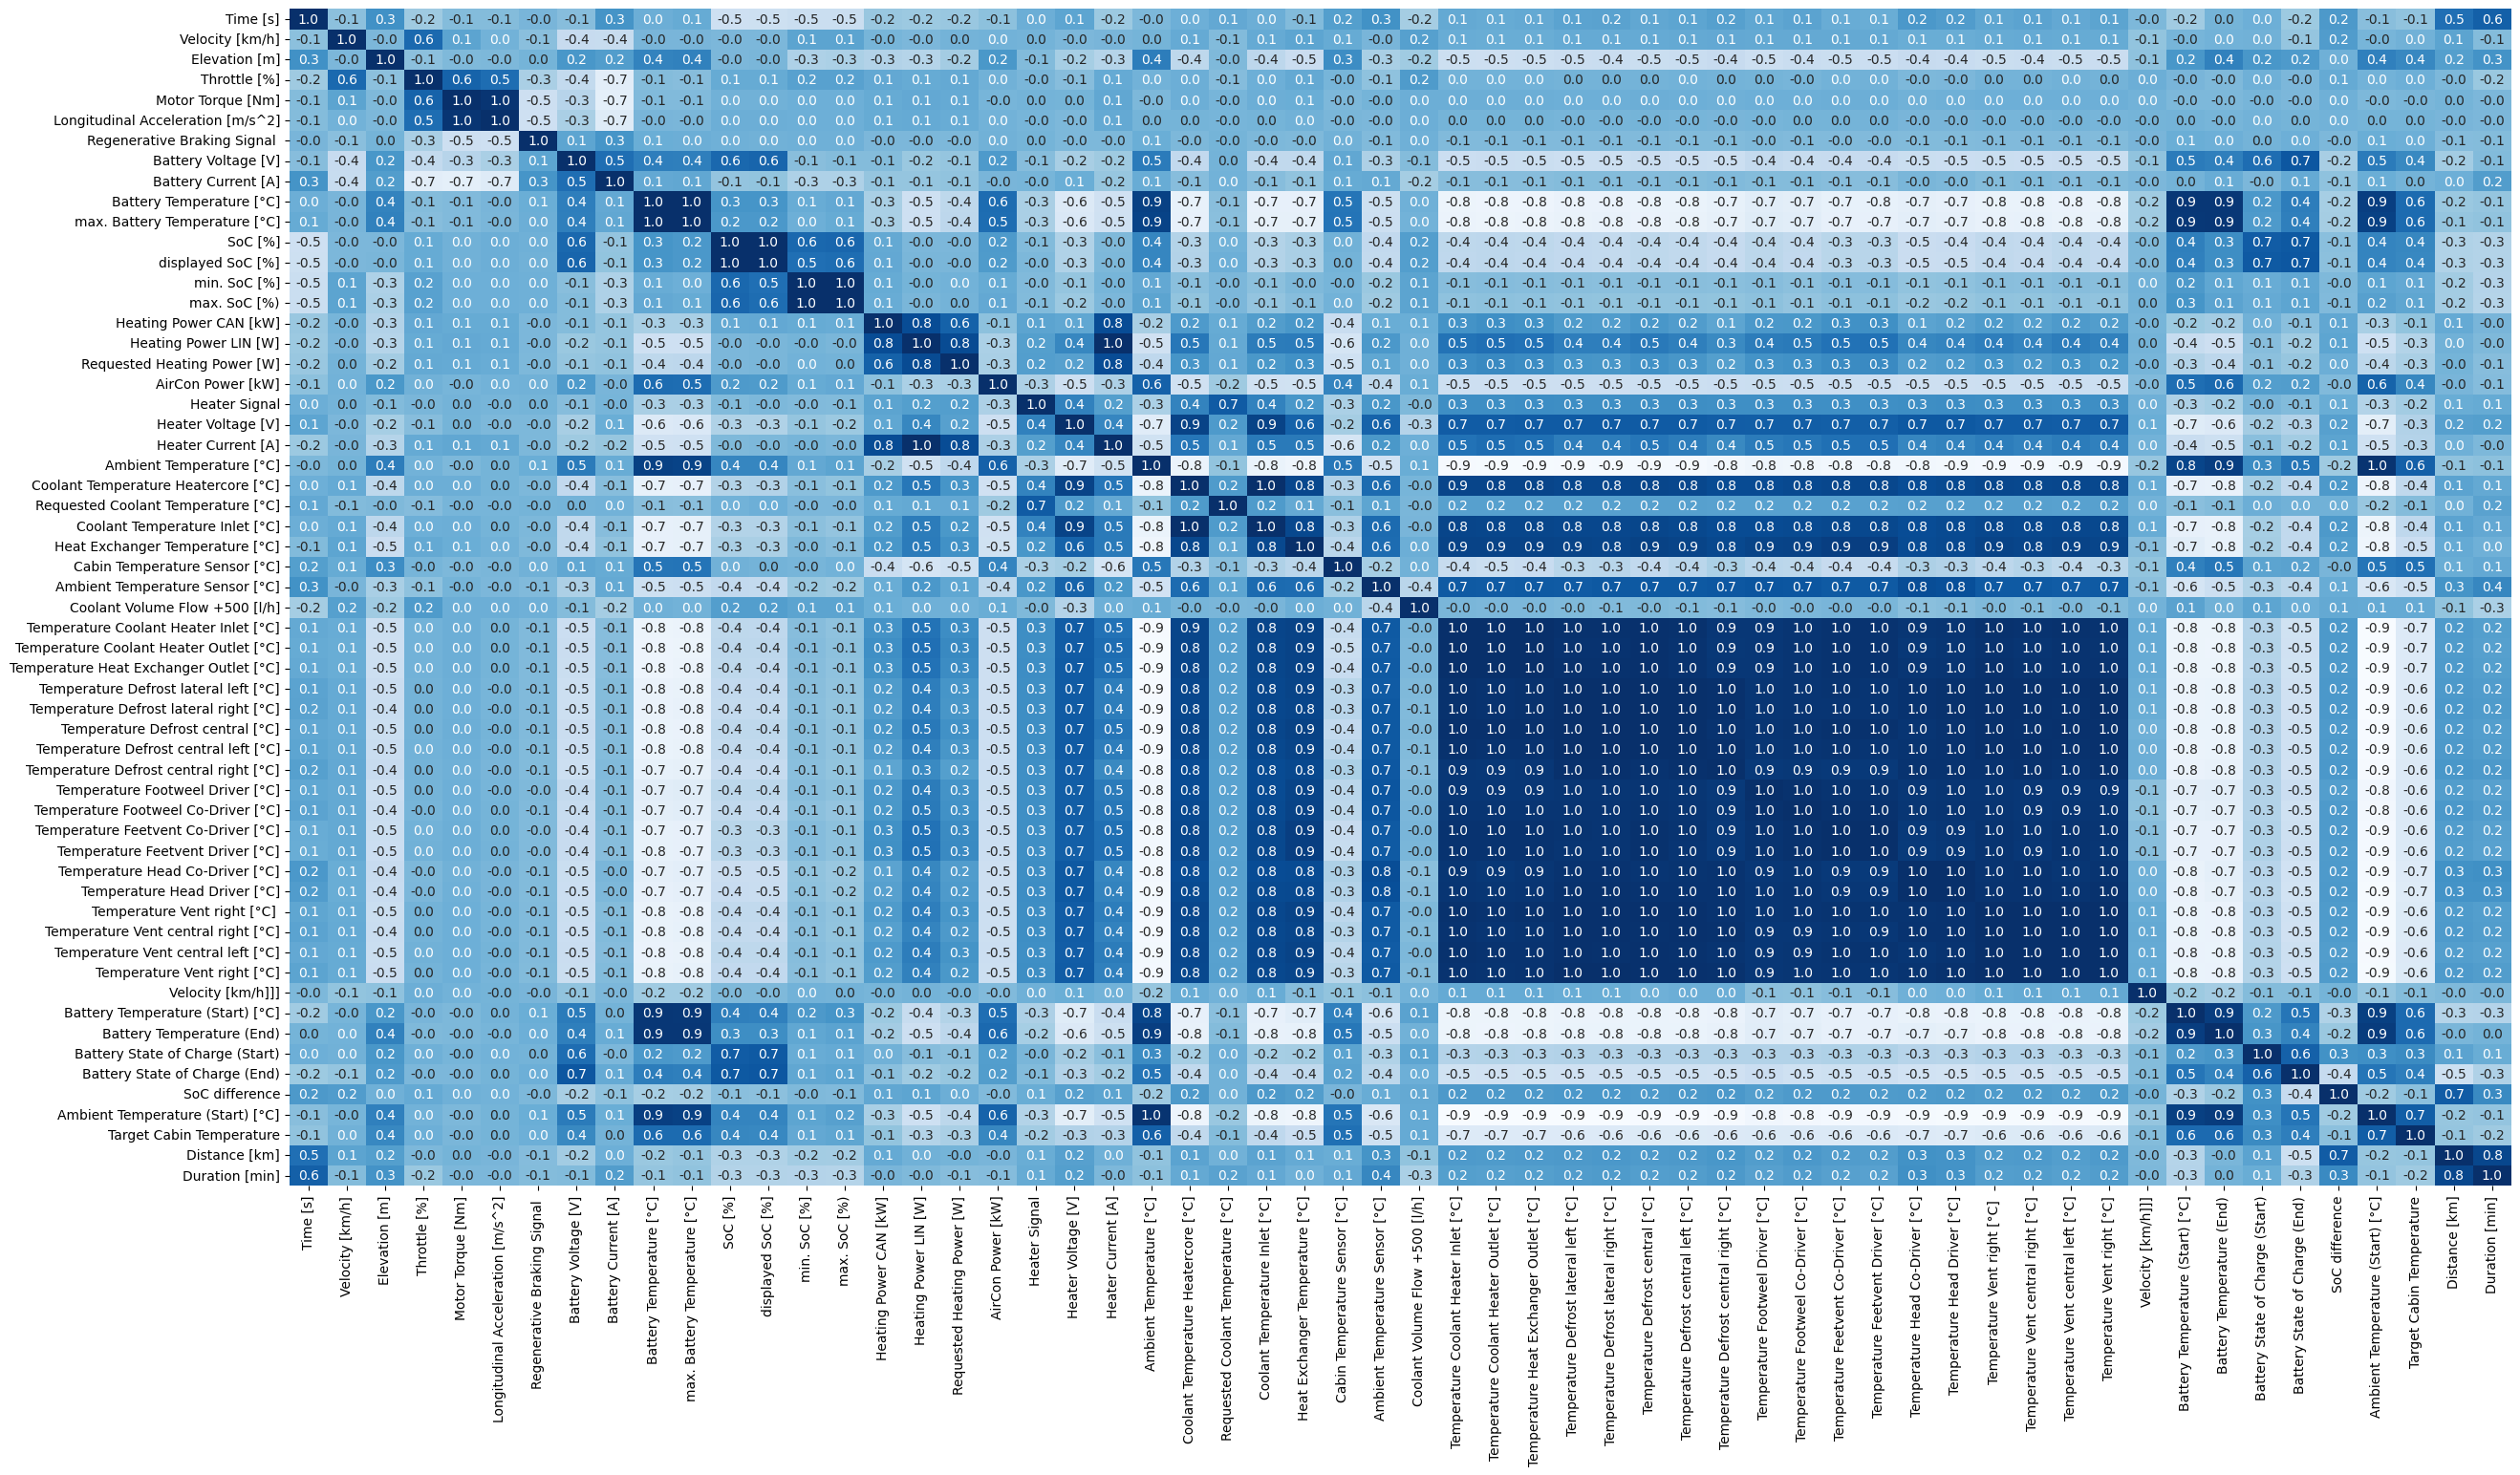

In [8]:
# Correlation between features
plt.figure(figsize=(30, 16))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [ ]:
# Select relevant columns
columns = ['Battery Temperature [°C]', 'Battery Voltage [V]', 'Weather', 'Battery Current [A]', 'Battery State of Charge (End)']
df_selected = df[columns]

# Handle missing values (drop or fill with mean, for example)
df_selected.dropna(inplace=True)

# Convert 'Weather' into one-hot encoded values using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_weather = encoder.fit_transform(df_selected[['Weather']])

# Create a DataFrame for the encoded weather columns and concatenate with the original DataFrame
encoded_weather_df = pd.DataFrame(encoded_weather, columns=encoder.get_feature_names_out(['Weather']))

<ipython-input-9-f1cdfa60132c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_selected

Battery Temperature [°C]  Battery Voltage [V] Weather  \
0                            21.0               391.40   sunny   
1                            21.0               391.40   sunny   
2                            21.0               391.40   sunny   
3                            21.0               391.40   sunny   
4                            21.0               391.40   sunny   
...                           ...                  ...     ...   
1094788                       3.0               367.15   sunny   
1094789                       3.0               367.20   sunny   
1094790                       3.0               367.15   sunny   
1094791                       3.0               367.10   sunny   
1094792                       3.0               367.10   sunny   

         Battery Current [A]  Battery State of Charge (End)  
0                      -2.20                          0.803  
1                      -2.21                          0.803  
2                      -2.26                          0.803  
3                      -2.30                          0.803  
4                      -2.30                          0.803  
...                      ...                            ...  
1094788                -4.00                          0.488  
1094789                -4.20                          0.488  
1094790                -4.05                          0.488  
1094791                -3.90                          0.488  
1094792                -3.90                          0.488  

[1094793 rows x 5 columns]

In [ ]:
# prompt: how to see the result of value one hot encoder for weather like sunny = 0, slightly cloudy =1, cloudy=2, etc

weather_mapping = dict(zip(encoder.categories_[0], range(len(encoder.categories_[0]))))
print(weather_mapping)


{'cloudy': 0, 'dark': 1, 'dark, little rainy': 2, 'rainy': 3, 'slightly cloudy': 4, 'sunny': 5, 'sunrise': 6, 'sunset': 7}


In [ ]:
# Drop the original 'Weather' column and concatenate the new one-hot encoded columns
df_selected = pd.concat([df_selected.drop('Weather', axis=1), encoded_weather_df], axis=1)

# Features and target
X = df_selected.drop('Battery State of Charge (End)', axis=1)
y = df_selected['Battery State of Charge (End)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

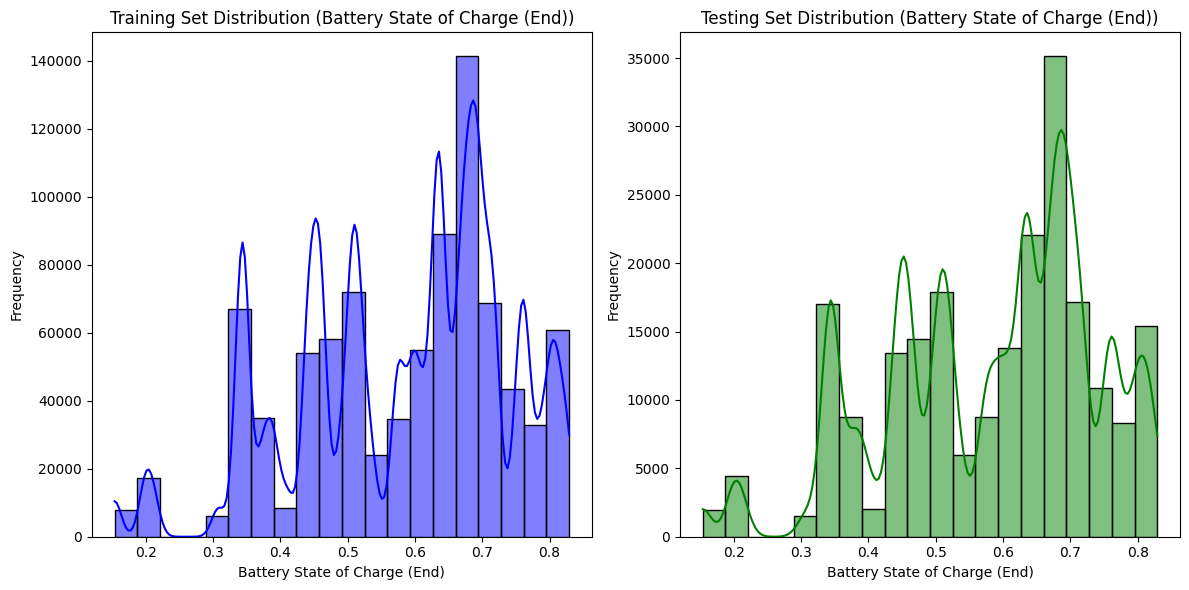

In [ ]:
# Visualize the distribution of the target variable (Battery State of Charge (End)) in the training and testing sets

plt.figure(figsize=(12, 6))

# Training set distribution
plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=20, kde=True, color='blue')
plt.title('Training Set Distribution (Battery State of Charge (End))')
plt.xlabel('Battery State of Charge (End)')
plt.ylabel('Frequency')

# Testing set distribution
plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=20, kde=True, color='green')
plt.title('Testing Set Distribution (Battery State of Charge (End))')
plt.xlabel('Battery State of Charge (End)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

RANDOM FOREST REGRESSOR

In [ ]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[0.713      0.693      0.5811     ... 0.66596273 0.4852     0.70755   ]


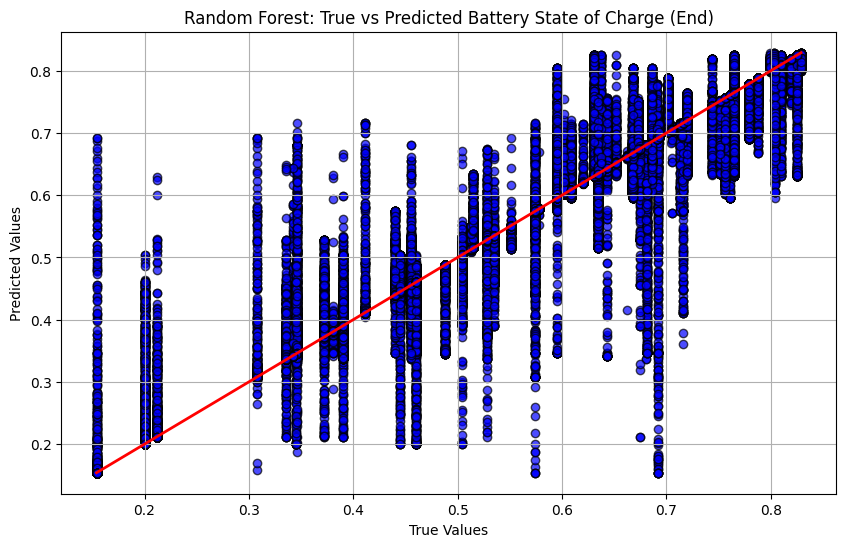

In [ ]:
# Scatter plot to compare the true and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line (perfect prediction)
plt.title('Random Forest: True vs Predicted Battery State of Charge (End)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squarred Error: {mse}')

Mean Absolute Error: 0.012226632121459247
Mean Squarred Error: 0.0012633107768219955


BI-LSTM

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (LSTM expects 3D input: samples, timesteps, features)
# Assuming timesteps = 1 for this case
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
# Build the Bidirectional LSTM model
bi_lstm_model = Sequential()

# Adding the Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
bi_lstm_model.add(Dropout(0.2))

# Another LSTM layer without return_sequences
bi_lstm_model.add(Bidirectional(LSTM(units=64)))
bi_lstm_model.add(Dropout(0.2))

# Dense output layer
bi_lstm_model.add(Dense(units=1))  # Since it's a regression task, output is a single value

# Compile the bi_lstm_model
bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback to stop training if the loss goes below 0.002
early_stopping = EarlyStopping(
    monitor='loss',  # Monitor the training loss
    # patience=5,      # Number of epochs with no improvement after which training will be stopped
    min_delta=0.0002, # The minimum threshold to stop training
    mode='min',      # Stop when the loss has decreased below the threshold
    verbose=1,
    restore_best_weights=True  # Restore the weights from the best epoch
)

# Modify the callback to stop when loss/val_loss reaches 0.0002
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') <= 0.0020 and logs.get('val_loss') <= 0.0020:
            print(f"Stopping training as loss {logs.get('loss')} and val_loss {logs.get('val_loss')} are below 0.0002")
            self.model.stop_training = True

# Use the custom callback in addition to EarlyStopping
callback = Callbacks()

In [ ]:
# Train the model
history = bi_lstm_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callback)

# Predict on the test set
y_pred_lstm = bi_lstm_model.predict(X_test_scaled)

Epoch 1/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 96s 8ms/step - loss: 0.0110 - val_loss: 0.0040
Epoch 2/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 89s 8ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 3/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 143s 8ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 4/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 140s 8ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 5/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 97s 9ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 6/50
10947/10948 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019Stopping training as loss 0.001829947461374104 and val_loss 0.0011933866189792752 are below 0.0002
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 138s 8ms/step - loss: 0.0019 - val_loss: 0.0012
6843/6843 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


In [ ]:
print(y_pred_lstm)

[[0.69295126]
 [0.7133722 ]
 [0.5881487 ]
 ...
 [0.66509235]
 [0.4337923 ]
 [0.76153195]]


Bi-LSTM Mean Absolute Error: 0.020620095222674325
Bi-LSTM Mean Squarred Error: 0.0011863976847129882


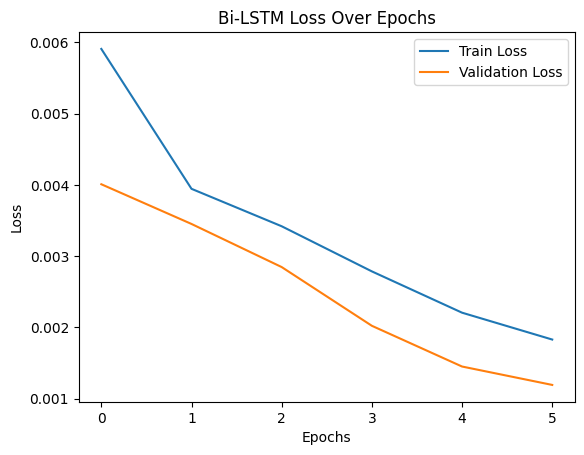

In [ ]:
# Evaluate the model
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'Bi-LSTM Mean Absolute Error: {mae_lstm}')
print(f'Bi-LSTM Mean Squarred Error: {mse_lstm}')

# Plotting the loss over epochs to visualize the training process
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Bi-LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

LSTM

In [ ]:
# Define the LSTM model
lstm_model = Sequential()

# Add LSTM layer
lstm_model.add(LSTM(units=50, input_shape=(1, X_train.shape[1])))
lstm_model.add(Dropout(0.2))  # Add dropout to prevent overfitting

# Add a dense layer for the output
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = lstm_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callback)

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test_scaled)

Epoch 1/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0519 - val_loss: 0.0464
Epoch 2/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.0491 - val_loss: 0.0444
Epoch 3/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0474 - val_loss: 0.0425
Epoch 4/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.0461 - val_loss: 0.0418
Epoch 5/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0449 - val_loss: 0.0404
Epoch 6/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.0442 - val_loss: 0.0397
Epoch 7/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.0434 - val_loss: 0.0384
Epoch 8/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0425 - val_loss: 0.0374
Epoch 9/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0418 - val_loss: 0.0371
Epoch 10/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0413 - val_loss: 0.0363
Epoch 11/50
10948/10948 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.0410 - val_loss: 0.03

In [ ]:
print(y_pred_lstm)

[[0.6824246 ]
 [0.6821641 ]
 [0.5641586 ]
 ...
 [0.6367504 ]
 [0.46742254]
 [0.64072037]]


LSTM Mean Absolute Error: 0.03056465509129489
LSTM Mean Absolute Error: 0.0031496242095959827


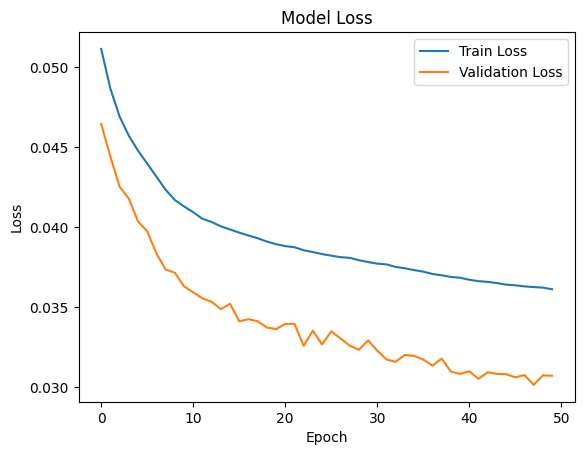

In [ ]:
# Evaluate the model
mae_xlstm = mean_absolute_error(y_test, y_pred_lstm)
mse_xlstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM Mean Absolute Error: {mae_xlstm}')
print(f'LSTM Mean Absolute Error: {mse_xlstm}')

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Frozen Model

In [ ]:
# Save the model as an H5 file
bi_lstm_model.save("/content/drive/MyDrive/SCIHACK 2024/ML/Model/model.h5")

# Load the saved Bi-LSTM model
model = tf.keras.models.load_model("/content/drive/MyDrive/SCIHACK 2024/ML/Model/model.h5")

# Create a converter object and configure options
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_enable_resource_variables = True  # Enable resource variables
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Use TensorFlow Lite built-in operations
    tf.lite.OpsSet.SELECT_TF_OPS     # Allow TF Select ops (to handle unsupported ops)
]
converter._experimental_lower_tensor_list_ops = False  # Disable lowering TensorList ops

# Convert the model to TensorFlow Lite
tflite_model = converter.convert()

# Save the converted model as a .tflite file
tflite_model_path = "/content/drive/MyDrive/SCIHACK 2024/ML/Model/model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f'TensorFlow Lite model saved to: {tflite_model_path}')

Saved artifact at '/tmp/tmpx_3mlyxk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1, 11), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135519551834240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551836000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551836528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551776976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551780320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551779968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551991552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551994192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551993840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551983280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135519551986096: Tens

In [ ]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/SCIHACK 2024/ML/Model/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input details to see the input shape and type
print("Input details:", input_details)

# Example: Access the input tensor shape
input_shape = input_details[0]['shape']
print("Input tensor shape:", input_shape)


Input details: [{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1,  1, 11], dtype=int32), 'shape_signature': array([-1,  1, 11], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Input tensor shape: [ 1  1 11]


In [ ]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/SCIHACK 2024/ML/Model/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

# You can also iterate over a test dataset and make predictions
# for example, the X_test_scaled dataset from your preprocessing
for i in range(len(X_test_scaled)):
    input_data = np.array([X_test_scaled[i]], dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print(f"Prediction for sample {i}: {output_data[0][0]}")


Output streaming akan dipotong hingga 5000 baris terakhir.
Prediction for sample 5771: 0.5181208848953247
Prediction for sample 5772: 0.6641200184822083
Prediction for sample 5773: 0.5031670331954956
Prediction for sample 5774: 0.654668927192688
Prediction for sample 5775: 0.5729942321777344
Prediction for sample 5776: 0.6329079866409302
Prediction for sample 5777: 0.7506792545318604
Prediction for sample 5778: 0.4305274188518524
Prediction for sample 5779: 0.645226776599884
Prediction for sample 5780: 0.5817597508430481
Prediction for sample 5781: 0.4493167996406555
Prediction for sample 5782: 0.5719518661499023
Prediction for sample 5783: 0.6700025796890259
Prediction for sample 5784: 0.7601853013038635
Prediction for sample 5785: 0.6325849294662476
Prediction for sample 5786: 0.6586096286773682
Prediction for sample 5787: 0.44682979583740234
Prediction for sample 5788: 0.5698796510696411
Prediction for sample 5789: 0.44460004568099976
Prediction for sample 5790: 0.7662920951843262
P

KeyboardInterrupt: 